In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

data-police-shootings
fatal-police-shootings-in-the-us
individuals-killed-by-the-police
police-fatalities-from-2000-to-2016
us-police-shootings



In [2]:
data = pd.read_csv('../input/individuals-killed-by-the-police/Police Fatalities.csv')

In [3]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [4]:
data.tail()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False
12490,12861,Name withheld by police,39.0,Male,NaN,1/15/2010,Los Angeles,CA,Other,NaN,False,False


In [5]:
data.shape

(12491, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


In [7]:
data.describe()

,UID,Age
count,12491.000000,12258.000000
mean,7759.543832,35.269538
std,4313.834339,12.979532
min,2.000000,1.000000
25%,4101.500000,25.000000
50%,7782.000000,33.000000
75%,11444.500000,44.000000
max,14980.000000,107.000000


In [8]:
data.dtypes

UID                  int64
Name                object
Age                float64
Gender              object
Race                object
Date                object
City                object
State               object
Manner_of_death     object
Armed               object
Mental_illness        bool
Flee                  bool
dtype: object

In [9]:
data.isnull().sum()

UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed              5677
Mental_illness        0
Flee                  0
dtype: int64

In [10]:
data["Armed"].fillna("UnKnown", inplace = True)

In [11]:
data.isnull().sum()

UID                   0
Name                  0
Age                 233
Gender                8
Race               3965
Date                  0
City                  4
State                 0
Manner_of_death       0
Armed                 0
Mental_illness        0
Flee                  0
dtype: int64

In [12]:
data["Race"].fillna("UnKnown", inplace = True)

In [13]:
data.isnull().sum()

UID                  0
Name                 0
Age                233
Gender               8
Race                 0
Date                 0
City                 4
State                0
Manner_of_death      0
Armed                0
Mental_illness       0
Flee                 0
dtype: int64

In [14]:
data["Age"].fillna(data["Age"].mean(), inplace = True)

In [15]:
data.isnull().sum()

UID                0
Name               0
Age                0
Gender             8
Race               0
Date               0
City               4
State              0
Manner_of_death    0
Armed              0
Mental_illness     0
Flee               0
dtype: int64

In [16]:
data =data.dropna(how='any')
data.shape

(12479, 12)

In [17]:
data.isnull().sum()

UID                0
Name               0
Age                0
Gender             0
Race               0
Date               0
City               0
State              0
Manner_of_death    0
Armed              0
Mental_illness     0
Flee               0
dtype: int64

In [18]:
data['State'].unique()

array(['CA', 'NV', 'NY', 'OR', 'WA', 'MN', 'TX', 'IL', 'LA', 'FL', 'NC',
       'UT', 'VA', 'HI', 'MT', 'PA', 'GA', 'NJ', 'AL', 'SC', 'CT', 'NM',
       'WI', 'CO', 'TN', 'OH', 'AZ', 'RI', 'MS', 'MD', 'MO', 'KY', 'MI',
       'DC', 'IN', 'NE', 'MA', 'KS', 'AR', 'DE', 'ME', 'IA', 'AK', 'OK',
       'VT', 'WV', 'WY', 'ID', 'NH', 'SD', 'ND'], dtype=object)

In [19]:
def state(x):
    if x=='AL':
        return('Alabama')
    elif x=='AK':
        return('Alaska')
    elif x=='AZ':
        return('Arizona')
    elif x=='AR':
        return('Arkansas')
    elif x=='AZ':
        return('Arizona')
    elif x=='CA':
        return('California')
    elif x=='CO':
        return('Colorado')
    elif x=='CT':
        return('Connecticut')
    elif x=='DE':
        return('Delaware')
    elif x=='FL':
        return('Florida')
    elif x=='GE':
        return('Georgia')
    elif x=='HI':
        return('Hawaii')
    elif x=='FL':
        return('Idaho')
    elif x=='IL':
        return('Illinois')
    elif x=='IN':
        return('Indiana')
    elif x=='IA':
        return('Iowa')
    elif x=='KS':
        return('Kansas')
    elif x=='KY':
        return('Kentucky')
    elif x=='LA':
        return('Louisiana')
    elif x=='ME':
        return('Maine')
    elif x=='MD':
        return('Maryland')
    elif x=='MA':
        return('Massachusetts')
    elif x=='MI':
        return('Michigan')
    elif x=='MN':
        return('Minnesota')
    elif x=='MS':
        return('Mississippi')
    elif x=='MO':
        return('Missouri')
    elif x=='MT':
        return('Montana')
    elif x=='NE':
        return('Nebraska')
    elif x=='NV':
        return('Nevada')
    elif x=='NH':
        return('New Hampshire')
    elif x=='NJ':
        return('New Jersey')
    elif x=='NM':
        return('New Mexico')
    elif x=='NY':
        return('New York')
    elif x=='NC':
        return('North Carolina')
    elif x=='ND':
        return('North Dakota')
    elif x=='OH':
        return('Ohio')
    elif x=='OK':
        return('Oklahoma')
    elif x=='OR':
        return('Oregon')
    elif x=='PA':
        return('Pennsylvania')
    elif x=='RI':
        return('Rhode Island')
    elif x=='SC':
        return('South Carolina')
    elif x=='SD':
        return('South Dakota')
    elif x=='TN':
        return('Tennessee')
    elif x=='TX':
        return('Texas')
    elif x=='UT':
        return('Utah')
    elif x=='VT':
        return('Vermont')
    elif x=='VA':
        return('Virginia')
    elif x=='WA':
        return('Washington')
    elif x=='WV':
        return('West Virginia')
    elif x=='WI':
        return('Wisconsin')
    else:
        return('Wyoming')
    


In [20]:
data['State']=data['State'].apply(state)

In [21]:
data['State'].unique()

array(['California', 'Nevada', 'New York', 'Oregon', 'Washington',
       'Minnesota', 'Texas', 'Illinois', 'Louisiana', 'Florida',
       'North Carolina', 'Utah', 'Virginia', 'Hawaii', 'Montana',
       'Pennsylvania', 'Wyoming', 'New Jersey', 'Alabama',
       'South Carolina', 'Connecticut', 'New Mexico', 'Wisconsin',
       'Colorado', 'Tennessee', 'Ohio', 'Arizona', 'Rhode Island',
       'Mississippi', 'Maryland', 'Missouri', 'Kentucky', 'Michigan',
       'Indiana', 'Nebraska', 'Massachusetts', 'Kansas', 'Arkansas',
       'Delaware', 'Maine', 'Iowa', 'Alaska', 'Oklahoma', 'Vermont',
       'West Virginia', 'New Hampshire', 'South Dakota', 'North Dakota'],
      dtype=object)

In [22]:
data['State'].head()

0    California
1    California
2    California
3    California
4    California
Name: State, dtype: object

In [23]:
def Region(x):
    if x=='Alabama':
        return('south')
    elif x=='Alaska':
        return('west')
    elif x=='Arizona':
        return('west')
    elif x=='Arkansas':
        return('south')

    elif x=='California':
        return('west')
    
    elif x=='Colorado':
        return('west')
    
    elif x=='Connecticut':
        return('northeast')
    
    elif x=='Delaware':
        return('south')
    
    elif x=='Florida':
        return('south')
    elif x=='Georgia':
        return('south')
    elif x=='Hawaii':
        return('west')
    elif x=='Idaho':
        return('west')
    elif x=='Illinois':
        return('Midwest')
    elif x=='Indiana':
        return('Midwest')
    elif x=='Iowa':
        return('Midwest')
    elif x=='Kansas':
        return('Midwest')
    elif x=='Kentucky':
        return('south')
    elif x=='Louisiana':
        return('south')
    elif x=='Maine':
        return('northeast')
    elif x=='Maryland':
        return('south')
    elif x=='Massachusetts':
        return('northeast')
    elif x=='Michigan':
        return('Midwest')
    elif x=='Minnesota':
        return('Midwest')
    elif x=='Mississippi':
        return('south')
    elif x=='Missouri':
        return('Midwest')
    elif x=='Montana':
        return('west')
    elif x=='Nebraska':
        return('Midwest')
    elif x=='Nevada':
        return('west')
    elif x=='New Hampshire':
        return('northeast')
    elif x=='New Jersey':
        return('northeast')
    elif x=='New Mexico':
        return('west')
    elif x=='New York':
        return('northeast')
    elif x=='North Carolina':
        return('south')
    elif x=='North Dakota':
        return('Midwest')
    elif x=='Ohio':
        return('Midwest')
    elif x=='Oklahoma':
        return('south')
    elif x=='Oregon':
        return('west')
    elif x=='Pennsylvania':
        return('northeast')
    elif x=='Rhode Island':
        return('northeast')
    elif x=='South Carolina':
        return('south')
    elif x=='South Dakota':
        return('Midwest')
    elif x=='Tennessee':
        return('south')
    elif x=='Texas':
        return('south')
    elif x=='Utah':
        return('west')
    elif x=='Vermont':
        return('northeast')
    elif x=='Virginia':
        return('south')
    elif x=='Washington':
        return('west')
    elif x=='West Virginia':
        return('south')
    elif x=='Wisconsin':
        return('Midwest')
    elif x=='Wyoming':
        return('west')
    

In [24]:
data['Region']=data['State'].apply(Region)

In [25]:
data['Region'].unique()

array(['west', 'northeast', 'Midwest', 'south'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='Count'>

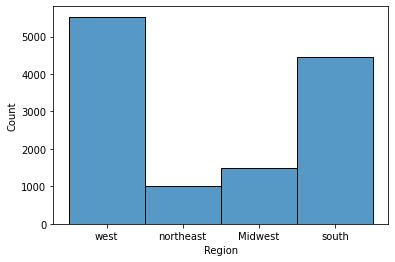

In [26]:
sns.histplot(data['Region'])

In [27]:
data['Region'].isnull().sum()

0

In [28]:
data['Race'].unique()

array(['Asian', 'Black', 'Hispanic', 'Other', 'Native', 'White',
       'UnKnown'], dtype=object)

<AxesSubplot:xlabel='Race', ylabel='Count'>

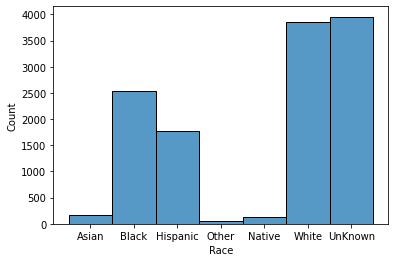

In [29]:
sns.histplot(data['Race'])

In [30]:
data['Manner_of_death'].unique()

array(['Shot', 'Shot and Tasered', 'Tasered', 'Other'], dtype=object)

<AxesSubplot:xlabel='Manner_of_death', ylabel='Count'>

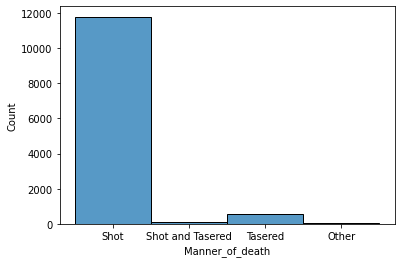

In [31]:
sns.histplot(data['Manner_of_death'])

In [32]:
data['Armed'].unique()

array(['UnKnown', 'Gun', 'Knife', 'Unarmed', 'Vehicle', 'Unknown Weapon',
       'Toy Weapon', 'Machete', 'Hammer', 'Toy weapon', 'Flagpole',
       'Sword', 'Chain', 'Guns And Explosives', 'Gun And Knife',
       'Baseball Bat', 'Pole', 'Axe', 'Piece Of Wood', 'Motorcycle',
       'Metal Hand Tool', 'Box Cutter', 'Tasered', 'Nail Gun',
       'Sharp Object', 'Meat Cleaver', "Contractor'S Level", 'Metal Pipe',
       'Stapler', 'Hand Torch', 'Scissors', 'Pick-Axe', 'Shovel', 'Spear',
       'Metal Pole', 'Bayonet', 'Brick', 'Metal Object', 'Metal Stick',
       'Bean-Bag Gun', 'Pipe', 'Blunt Object', 'Hatchet',
       'Cordless Drill', 'Carjack', 'Crossbow',
       'Baseball Bat And Fireplace Poker', 'Chain Saw', 'Garden Tool',
       'Pitchfork', 'Hatchet And Gun', 'Rock', 'Glass Shard',
       'Screwdriver', 'Lawn Mower Blade', 'Straight Edge Razor',
       'Flashlight', 'Beer Bottle', 'Baton', 'Metal Rake'], dtype=object)

In [33]:
'5/4/2000'.split('/')[2]

'2000'

In [34]:
def year(x):
    return x.split('/')[2]

In [35]:
data['Year']=data['Date'].apply(year)

In [36]:
data['Year'].head()

0    2000
1    2000
2    2000
3    2001
4    2001
Name: Year, dtype: object

In [37]:
data['Year'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [38]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001


In [39]:
def month(x):
    return x.split('/')[0]

In [40]:
data['Month']=data['Date'].apply(month)

In [41]:
data['Month'].unique()

array(['5', '6', '8', '2', '7', '9', '10', '11', '12', '1', '4', '3'],
      dtype=object)

In [42]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000,5
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000,6
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000,8
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001,6


In [43]:
def quarter(x):
    if x <= 3:
        return(1)
    elif x <=6:
        return(2)
    elif x <= 9:
        return(3)
    else:
        return(4)   

In [44]:
quarter(15)

4

In [45]:
data['Month']=data['Month'].astype(int)

In [46]:
data['Quarter']=data['Month'].apply(quarter)

In [47]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000,5,2
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000,6,2
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000,8,3
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2,1
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001,6,2


In [48]:
def day(x):
    return x.split('/')[1]

In [49]:
data['Day']=data['Date'].apply(day)

In [50]:
data['Day']=data['Day'].astype(int)

In [51]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000,5,2,4
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000,6,2,2
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000,8,3,13
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2,1,9
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001,6,2,10


In [52]:
data['Week']=(((((data['Month']-1)*30)+data['Day'])/7)+1).astype(int)

In [53]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000,5,2,4,18
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000,6,2,2,22
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000,8,3,13,32
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2,1,9,6
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001,6,2,10,23


In [54]:
data['Week'].unique()

array([18, 22, 32,  6, 23, 25, 26, 27,  8, 19, 21, 36, 39, 40, 44, 46, 50,
        1, 16, 28, 35, 41, 42,  4, 29, 20, 45, 52, 11, 15, 24,  3, 10, 17,
       37, 48,  2, 30,  9, 12, 13, 31, 38, 51,  5, 34, 49, 47, 43, 14,  7,
       33])

In [55]:
data['Week']=data['Week'].apply(str)

In [56]:
data['Age'].max()

107.0

In [57]:
data['Age'].min()

1.0

In [58]:
data['Age'].unique()

array([ 44.        ,  26.        ,  36.        ,  29.        ,
        25.        ,  55.        ,  33.        ,  21.        ,
        27.        ,  52.        ,  23.        ,  37.        ,
        46.        ,  38.        ,  28.        ,  48.        ,
        39.        ,  41.        ,  62.        ,  19.        ,
        43.        ,  57.        ,  32.        ,  49.        ,
        61.        ,  34.        ,  22.        ,  53.        ,
        47.        ,  31.        ,  51.        ,  50.        ,
        63.        ,  72.        ,  42.        ,  40.        ,
        20.        ,  35.        ,  45.        ,  35.26953826,
        60.        ,  59.        ,  30.        ,  18.        ,
        76.        ,  15.        ,  17.        ,  68.        ,
        54.        ,  16.        ,  88.        ,  56.        ,
        14.        ,  24.        ,  12.        ,  64.        ,
        78.        ,  58.        ,  74.        ,  92.        ,
        66.        ,  71.        ,  73.        ,  84.  

In [59]:
data['Age']=data['Age'].astype(int)

In [60]:
data['Age'].unique()

array([ 44,  26,  36,  29,  25,  55,  33,  21,  27,  52,  23,  37,  46,
        38,  28,  48,  39,  41,  62,  19,  43,  57,  32,  49,  61,  34,
        22,  53,  47,  31,  51,  50,  63,  72,  42,  40,  20,  35,  45,
        60,  59,  30,  18,  76,  15,  17,  68,  54,  16,  88,  56,  14,
        24,  12,  64,  78,  58,  74,  92,  66,  71,  73,  84,  69,   7,
        13,  77,   1,  70, 107,  86,  93,  67,  65,  87,  11,  80,  95,
        79,   8,  10,   5,  81,  75,  83,  89,   6,   4,  90,  82,  85,
         3])

In [61]:
def  Stages_of_Life (x):
    if x<=1:
        return ("Infant")
    elif x<=4:
        return ("Toddler")
    elif x<=12:
        return ("Child")
    elif x<=19:
        return ("Teen")
    elif x<=39:
        return ("Adult")
    elif x<=59:
        return ("Middle Age Adult")
    else:
        return ("Senior Adult")

In [62]:
data['Stages of Life']=data['Age'].apply(Stages_of_Life)

In [63]:
data['Stages of Life'].unique()

array(['Middle Age Adult', 'Adult', 'Senior Adult', 'Teen', 'Child',
       'Infant', 'Toddler'], dtype=object)

In [64]:
data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
0,133,Karen O. Chin,44,Female,Asian,5/4/2000,Alameda,California,Shot,UnKnown,False,False,west,2000,5,2,4,18,Middle Age Adult
1,169,Chyraphone Komvongsa,26,Male,Asian,6/2/2000,Fresno,California,Shot,UnKnown,False,False,west,2000,6,2,2,22,Adult
2,257,Ming Chinh Ly,36,Male,Asian,8/13/2000,Rosemead,California,Shot,Gun,False,False,west,2000,8,3,13,32,Adult
3,483,Kinh Quoc Dao,29,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2,1,9,6,Adult
4,655,Vanpaseuth Phaisouphanh,25,Male,Asian,6/10/2001,Riverside,California,Shot,Knife,False,False,west,2001,6,2,10,23,Adult


In [65]:
data[data['Stages of Life']=='Infant']

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
1275,7747,Dylan Samuel-Peters,1,Male,Black,4/15/2013,Brooklyn,New York,Shot,UnKnown,True,False,northeast,2013,4,2,15,16,Infant
3008,2827,Suzie Pena,1,Female,Hispanic,7/10/2005,Los Angeles,California,Shot,Gun,True,False,west,2005,7,3,10,28,Infant
5453,5506,Logan Hancock,1,Male,White,7/20/2010,Wedowee,Alabama,Shot,UnKnown,False,False,south,2010,7,3,20,29,Infant
8977,1197,Thomas Monce-Grissom,1,Male,UnKnown,7/21/2002,Galveston,Texas,Shot,UnKnown,False,False,south,2002,7,3,21,29,Infant
9862,3731,Typhoon Dodge,1,Male,UnKnown,5/23/2007,Cut Off,Louisiana,Shot,UnKnown,False,False,south,2007,5,2,23,21,Infant


In [66]:
data[data['Stages of Life']=='Toddler']

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
7269,11666,Knight Petrillo,4,Male,White,6/21/2001,Aurora,Colorado,Shot,Gun,False,False,west,2001,6,2,21,25,Toddler
9410,2412,Trent Tucker,3,Male,UnKnown,9/11/2004,Grant,Alabama,Shot,UnKnown,False,False,south,2004,9,3,11,36,Toddler


In [67]:
data[(data['Stages of Life']=='Child')]

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
344,1411,Michael Ellerbe,12,Male,Black,12/24/2002,Uniontown,Pennsylvania,Shot,Unarmed,False,False,northeast,2002,12,4,24,51,Child
616,3790,DeAunta Terrell Farrow,12,Male,Black,6/22/2007,West Memphis,Arkansas,Shot,Toy weapon,False,False,south,2007,6,2,22,25,Child
855,5387,Aiyana Mo'Nay Stanley Jones,7,Female,Black,5/16/2010,Detroit,Michigan,Shot,Gun,False,False,Midwest,2010,5,2,16,20,Child
1665,9841,Tamir E. Rice,12,Male,Black,11/22/2014,Cleveland,Ohio,Shot,Gun,False,False,Midwest,2014,11,4,22,47,Child
2737,305,Alberto Sepulveda,11,Male,Hispanic,9/13/2000,Modesto,California,Shot,Gun,False,False,west,2000,9,3,13,37,Child
3040,3129,Lourdes Cruz Morales,12,Female,Hispanic,3/5/2006,Dateland,Arizona,Shot,UnKnown,False,False,west,2006,3,1,5,10,Child
5011,2941,Ian Terry,8,Male,White,10/10/2005,Windermere,Florida,Shot,UnKnown,False,False,south,2005,10,4,10,41,Child
5012,2942,Elyse Terry,10,Female,White,10/10/2005,Windermere,Florida,Shot,UnKnown,False,False,south,2005,10,4,10,41,Child
5159,3853,Austin Haley,5,Male,White,8/3/2007,Noble,Oklahoma,Shot,UnKnown,False,False,south,2007,8,3,3,31,Child
5973,7498,Maximillian Walters,5,Male,White,1/22/2013,Boulder City,Nevada,Shot,UnKnown,False,False,west,2013,1,1,22,4,Child


In [68]:
data[(data['Stages of Life']=='Child') & (data['Armed']=='Gun')]

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
855,5387,Aiyana Mo'Nay Stanley Jones,7,Female,Black,5/16/2010,Detroit,Michigan,Shot,Gun,False,False,Midwest,2010,5,2,16,20,Child
1665,9841,Tamir E. Rice,12,Male,Black,11/22/2014,Cleveland,Ohio,Shot,Gun,False,False,Midwest,2014,11,4,22,47,Child
2737,305,Alberto Sepulveda,11,Male,Hispanic,9/13/2000,Modesto,California,Shot,Gun,False,False,west,2000,9,3,13,37,Child
7268,11665,Gabrielle Petrillo,6,Female,White,6/21/2001,Aurora,Colorado,Shot,Gun,False,False,west,2001,6,2,21,25,Child


In [69]:
data[(data['Stages of Life']=='Child') & (data['Armed']=='Unarmed')]

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
344,1411,Michael Ellerbe,12,Male,Black,12/24/2002,Uniontown,Pennsylvania,Shot,Unarmed,False,False,northeast,2002,12,4,24,51,Child
7105,11089,Jeremy Mardis,6,Male,White,11/3/2015,Marksville,Louisiana,Shot,Unarmed,False,False,south,2015,11,4,3,44,Child
7914,13960,Jeremy Mardis,6,Male,White,11/3/2015,Marksville,Louisiana,Shot,Unarmed,False,True,south,2015,11,4,3,44,Child
7999,14144,Ciara Meyer,12,Female,White,1/11/2016,Penn Township,Pennsylvania,Shot,Unarmed,False,False,northeast,2016,1,1,11,2,Child


In [70]:
data[(data['Stages of Life']=='Child') & (data['Armed']=='Unarmed') & (data['Flee']==True)]

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
7914,13960,Jeremy Mardis,6,Male,White,11/3/2015,Marksville,Louisiana,Shot,Unarmed,False,True,south,2015,11,4,3,44,Child


# Which year records the most Kill Events by police? 
How many males are there?
And how many mentally ill of them?
How many unarmed of them?

In [71]:
data['Year'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

<AxesSubplot:xlabel='Count', ylabel='Year'>

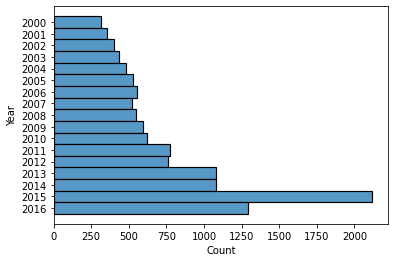

In [72]:
sns.histplot(y=data['Year'])

In [73]:
data.groupby('Year')['UID'].count().sort_values(ascending=False).head(5)

Year
2015    2120
2016    1296
2013    1081
2014    1080
2011     777
Name: UID, dtype: int64

<AxesSubplot:xlabel='Year'>

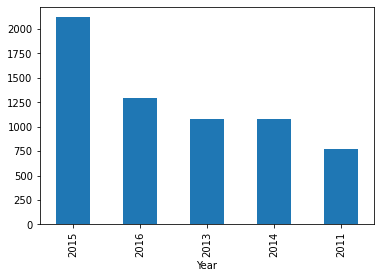

In [74]:
data.groupby('Year')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

#### 2015 was the year that records the most kill events

In [75]:
data[data['Year']=='2015'].head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
103,9978,Tim Elliott,53,Male,Asian,1/2/2015,Shelton,Washington,Shot,UnKnown,True,False,west,2015,1,1,2,1,Middle Age Adult
104,10077,Hung Trieu,35,Male,Asian,2/1/2015,Houston,Texas,Shot,UnKnown,False,False,south,2015,2,1,1,5,Adult
105,10374,Lue Vang,39,Male,Asian,4/22/2015,Eldorado Springs,Colorado,Shot,UnKnown,False,False,west,2015,4,2,22,17,Adult
106,10421,Thong Kien Ma,32,Male,Asian,5/5/2015,South El Monte,California,Shot,UnKnown,False,False,west,2015,5,2,5,18,Adult
107,10628,Ton Nguyen,60,Male,Asian,7/2/2015,San Diego,California,Shot,UnKnown,False,False,west,2015,7,3,2,27,Senior Adult


<AxesSubplot:xlabel='Age', ylabel='Density'>

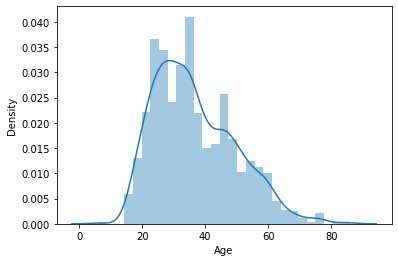

In [76]:
Killed_2015=data[data['Year']=='2015']
sns.distplot(Killed_2015['Age'])

<AxesSubplot:xlabel='Race', ylabel='Count'>

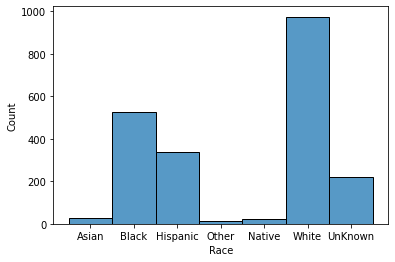

In [77]:
sns.histplot(Killed_2015['Race'])

#### most of those who killed in 2015 where of the white race

<AxesSubplot:xlabel='Month', ylabel='Count'>

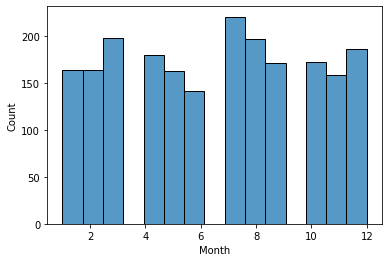

In [78]:
sns.histplot(Killed_2015['Month'])

#### most of those who killed in 2015 where killed in July

<AxesSubplot:xlabel='Quarter', ylabel='Count'>

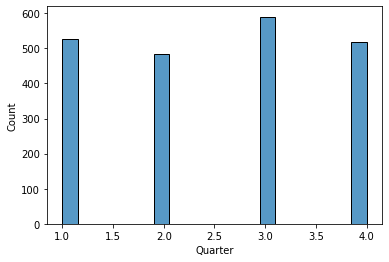

In [79]:
sns.histplot(Killed_2015['Quarter'])

#### most of those who killed in 2015 where killed in 3rd Quarter

In [80]:
Killed_2015.groupby('Week')['UID'].count().sort_values(ascending=False).head(5)


Week
27    64
12    53
22    53
41    53
29    52
Name: UID, dtype: int64

<AxesSubplot:xlabel='Week'>

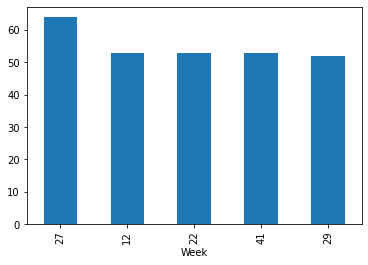

In [81]:
Killed_2015.groupby('Week')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [82]:
Killed_2015.groupby('Month')['UID'].count().sort_values(ascending=False).head(5)

Month
7     221
3     198
8     197
12    187
4     180
Name: UID, dtype: int64

<AxesSubplot:xlabel='Month'>

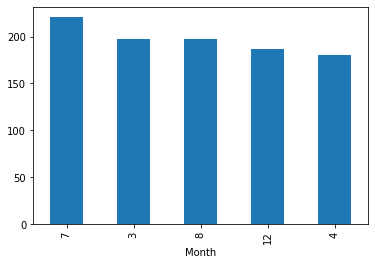

In [83]:
Killed_2015.groupby('Month')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [84]:
Killed_2015.groupby('Quarter')['UID'].count().sort_values(ascending=False).head(5)

Quarter
3    590
1    526
4    519
2    485
Name: UID, dtype: int64

<AxesSubplot:xlabel='Quarter'>

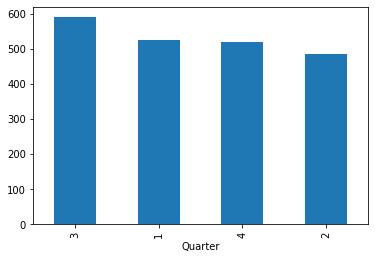

In [85]:
Killed_2015.groupby('Quarter')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [86]:
Killed_2015.groupby('Day')['UID'].count().sort_values(ascending=False).head(5)

Day
17    94
21    93
9     85
15    85
22    81
Name: UID, dtype: int64

<AxesSubplot:xlabel='Day'>

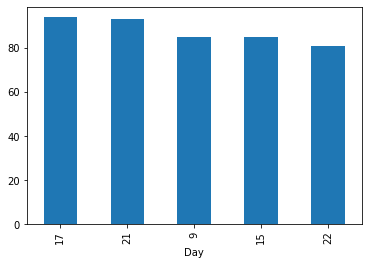

In [87]:
Killed_2015.groupby('Day')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [88]:
Killed_2015.groupby('Age')['UID'].count().sort_values(ascending=False).head(5)

Age
35    97
31    78
24    78
28    75
29    73
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

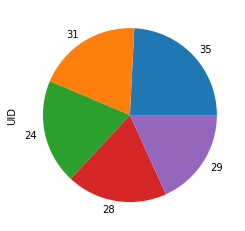

In [89]:
Killed_2015.groupby('Age')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [90]:
Killed_2015.groupby('Date')['UID'].count().sort_values(ascending=False).head(5)

Date
10/24/2015    16
12/14/2015    16
5/17/2015     16
7/7/2015      15
12/21/2015    15
Name: UID, dtype: int64

In [91]:
Killed_2015.groupby('Gender')['UID'].count().sort_values(ascending=False).head(5)

Gender
Male      2030
Female      90
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

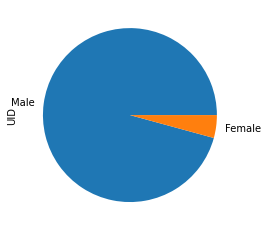

In [92]:
Killed_2015.groupby('Gender')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [93]:
Killed_2015.groupby('Day')['UID'].count().sort_values(ascending=False).head(5)

Day
17    94
21    93
9     85
15    85
22    81
Name: UID, dtype: int64

<AxesSubplot:ylabel='Day'>

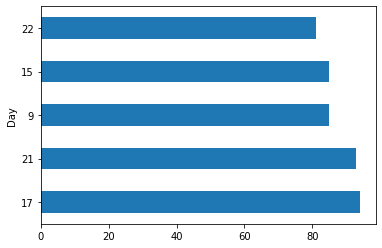

In [94]:
Killed_2015.groupby('Day')['UID'].count().sort_values(ascending=False).head(5).plot(kind='barh')

In [95]:
Killed_2015.groupby('Race')['UID'].count().sort_values(ascending=False).head(5)

Race
White       974
Black       526
Hispanic    338
UnKnown     220
Asian        26
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

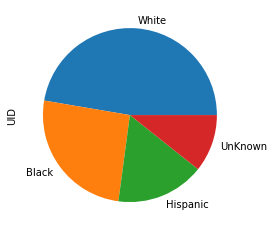

In [96]:
Killed_2015.groupby('Race')['UID'].count().sort_values(ascending=False).head(4).plot(kind='pie')

In [97]:
Killed_2015.groupby('City')['UID'].count().sort_values(ascending=False).head(5)

City
Los Angeles    34
Houston        28
Las Vegas      23
Miami          19
Phoenix        18
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

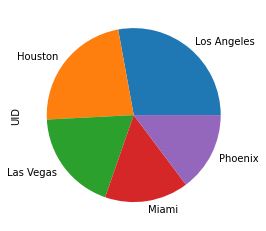

In [98]:
Killed_2015.groupby('City')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [99]:
Killed_2015.groupby('State')['UID'].count().sort_values(ascending=False).head(5)

State
California    389
Texas         222
Florida       129
Wyoming       101
Arizona        86
Name: UID, dtype: int64

<AxesSubplot:xlabel='State'>

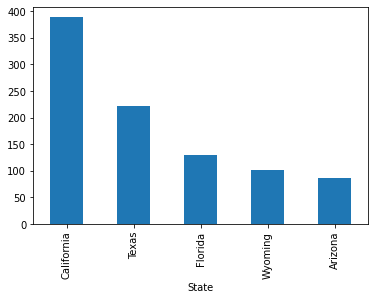

In [100]:
Killed_2015.groupby('State')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [101]:
Killed_2015.groupby('Manner_of_death')['UID'].count().sort_values(ascending=False).head(5)

Manner_of_death
Shot                1993
Shot and Tasered      68
Tasered               58
Other                  1
Name: UID, dtype: int64

<AxesSubplot:ylabel='Manner_of_death'>

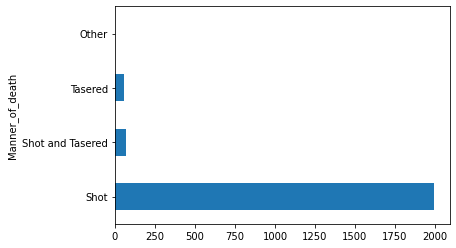

In [102]:
Killed_2015.groupby('Manner_of_death')['UID'].count().sort_values(ascending=False).head(5).plot(kind='barh')

In [103]:
Killed_2015.groupby('Armed')['UID'].count().sort_values(ascending=False).head(5)

Armed
Gun        996
UnKnown    593
Knife      261
Unarmed    106
Vehicle     55
Name: UID, dtype: int64

<AxesSubplot:xlabel='Armed'>

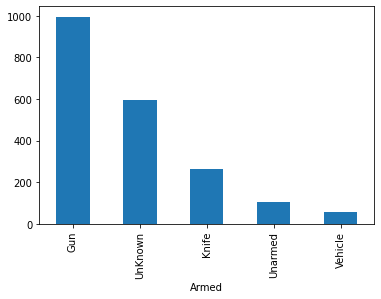

In [104]:
Killed_2015.groupby('Armed')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [105]:
Killed_2015.groupby('Flee')['UID'].count().sort_values(ascending=False).head(5)

Flee
False    1850
True      270
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

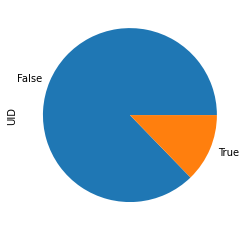

In [106]:
Killed_2015.groupby('Flee')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [107]:
Killed_2015.groupby('Stages of Life')['UID'].count().sort_values(ascending=False).head(5)

Stages of Life
Adult               1238
Middle Age Adult     655
Senior Adult         115
Teen                 110
Child                  2
Name: UID, dtype: int64

<AxesSubplot:ylabel='Stages of Life'>

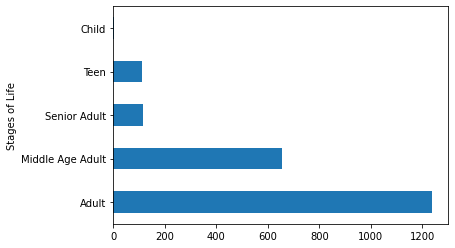

In [108]:
Killed_2015.groupby('Stages of Life')['UID'].count().sort_values(ascending=False).head(5).plot(kind='barh')

In [109]:
Killed_2015.groupby('Flee')['UID'].count().sort_values(ascending=False).head(5)

Flee
False    1850
True      270
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

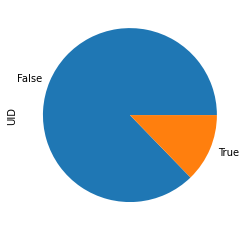

In [110]:
Killed_2015.groupby('Flee')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

# Which quarter records the most Kill Events by police?
How many of them were fled?
And how many Asians of them?
How many kiled by Tasered of them?

In [111]:
data.groupby('Quarter')['UID'].count().sort_values(ascending=False)

Quarter
1    3295
2    3200
3    3169
4    2815
Name: UID, dtype: int64

In [112]:
killed_by_quarter=data[data['Quarter']==1]
killed_by_quarter.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
3,483,Kinh Quoc Dao,29,Male,Asian,2/9/2001,Valley Glen,California,Shot,Gun,False,False,west,2001,2,1,9,6,Adult
10,965,Douglas Kim,55,Male,Asian,2/24/2002,Los Angeles,California,Shot,Gun,False,False,west,2002,2,1,24,8,Middle Age Adult
19,1433,Truyen The Pham,23,Male,Asian,1/5/2003,Houston,Texas,Shot,Gun,False,False,south,2003,1,1,5,1,Adult
20,1508,Thu Van Tran,48,Male,Asian,2/19/2003,Garden Grove,California,Shot,UnKnown,True,False,west,2003,2,1,19,8,Middle Age Adult
26,2033,Jack Sui,19,Male,Asian,1/23/2004,Long Beach,California,Shot,UnKnown,False,False,west,2004,1,1,23,4,Teen


In [113]:
killed_by_quarter.groupby('Age')['UID'].count().sort_values(ascending=False).head(5)

Age
35    134
29    120
26    116
22    115
24    114
Name: UID, dtype: int64

<AxesSubplot:xlabel='Age'>

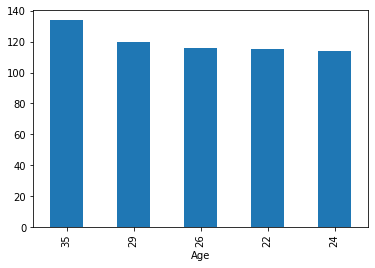

In [114]:
killed_by_quarter.groupby('Age')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [115]:
killed_by_quarter.groupby('Age')['UID'].count().sort_values(ascending=False).tail(5)

Age
83    1
84    1
85    1
10    1
89    1
Name: UID, dtype: int64

In [116]:
killed_by_quarter.groupby('Gender')['UID'].count().sort_values(ascending=False).head(5)

Gender
Male      3127
Female     168
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

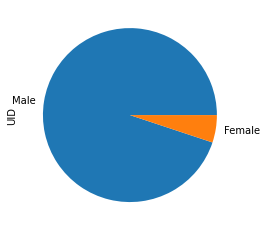

In [117]:
killed_by_quarter.groupby('Gender')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [118]:
killed_by_quarter.groupby('Race')['UID'].count().sort_values(ascending=False).head(5)

Race
UnKnown     1056
White       1023
Black        646
Hispanic     483
Asian         43
Name: UID, dtype: int64

<AxesSubplot:xlabel='Race'>

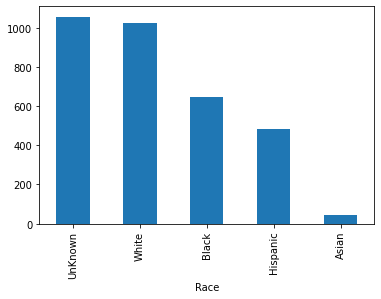

In [119]:
killed_by_quarter.groupby('Race')['UID'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [120]:
killed_by_quarter.groupby('Date')['UID'].count().sort_values(ascending=False).head(5)

Date
1/27/2016    18
2/28/2015    14
1/17/2016    14
3/27/2015    13
3/24/2016    13
Name: UID, dtype: int64

In [121]:
killed_by_quarter.groupby('City')['UID'].count().sort_values(ascending=False).head(5)

City
Los Angeles    89
Houston        68
Phoenix        49
Las Vegas      41
Chicago        36
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

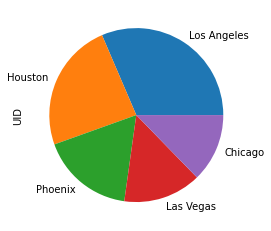

In [122]:
killed_by_quarter.groupby('City')['UID'].count().sort_values(ascending=False).head(5).plot(kind='pie')

In [123]:
killed_by_quarter.groupby('State')['UID'].count().sort_values(ascending=False).head(5)

State
California    769
Texas         309
Florida       271
Arizona       168
Wyoming       104
Name: UID, dtype: int64

# Which month records the most Kill Events by police?
How many females are there?
And how many Asians of them?
How many armed with a knife of them?

In [124]:
data.groupby('Month')['UID'].count().sort_values(ascending=False)

Month
3     1163
7     1108
1     1098
4     1096
8     1077
5     1060
6     1044
2     1034
10     999
9      984
11     917
12     899
Name: UID, dtype: int64

most of deaths ocurred in Marth

In [125]:
killed_in_march=data[data['Month']==3]

In [126]:
killed_in_march.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
44,4161,Daechull Chung,37,Male,Asian,3/16/2008,Las Vegas,Nevada,Shot,UnKnown,True,False,west,2008,3,1,16,11,Adult
57,5875,Van Dinh Le,57,Male,Asian,3/3/2011,Escondido,California,Shot,UnKnown,True,False,west,2011,3,1,3,10,Middle Age Adult
91,8888,Erdenebileg Sambuunyam,40,Male,Asian,3/9/2014,Buffalo Grove,Illinois,Shot,Knife,False,False,Midwest,2014,3,1,9,10,Middle Age Adult
92,8920,Errol Chang,34,Male,Asian,3/19/2014,Pacifica,California,Shot,Knife,True,False,west,2014,3,1,19,12,Adult
93,8941,Chieu-di Thi Vo,47,Female,Asian,3/25/2014,Greensboro,North Carolina,Shot,Knife,False,False,south,2014,3,1,25,13,Middle Age Adult


In [127]:
killed_in_march.shape

(1163, 19)

# **what is the ages of persons killed in march?

In [128]:
killed_in_march.groupby('Age')['UID'].count().sort_values(ascending=False)

Age
35    50
25    45
24    45
29    40
28    39
      ..
70     1
68     1
67     1
65     1
87     1
Name: UID, Length: 67, dtype: int64

<AxesSubplot:xlabel='Age'>

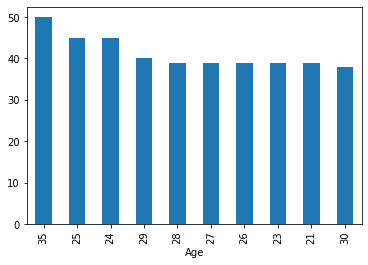

In [129]:
killed_in_march.groupby('Age')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar')

******what are the life stages of persons killed in march?

In [130]:
killed_in_march.groupby('Stages of Life')['UID'].count().sort_values(ascending=False)

Stages of Life
Adult               700
Middle Age Adult    334
Teen                 72
Senior Adult         56
Child                 1
Name: UID, dtype: int64

<AxesSubplot:xlabel='Stages of Life'>

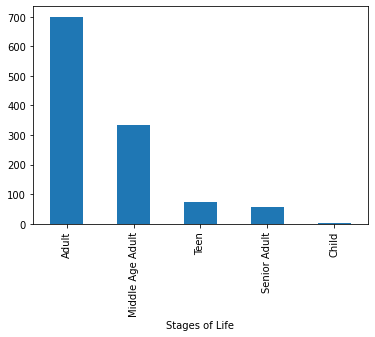

In [131]:
killed_in_march.groupby('Stages of Life')['UID'].count().sort_values(ascending=False).plot(kind='bar')

****** How many of the individuals killed in march are male?

In [132]:
killed_in_march.groupby('Gender')['UID'].count().sort_values(ascending=False)

Gender
Male      1114
Female      49
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

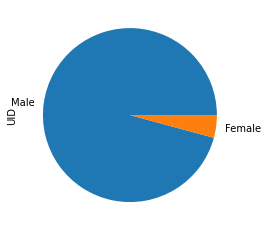

In [133]:
killed_in_march.groupby('Gender')['UID'].count().sort_values(ascending=False).plot(kind='pie')

****How many of the individuals killed in march are have mental ill?

In [134]:
killed_in_march.groupby('Mental_illness')['UID'].count().sort_values(ascending=False)

Mental_illness
False    874
True     289
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

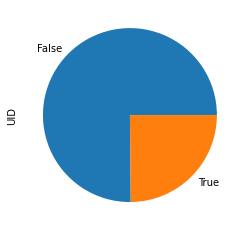

In [135]:
killed_in_march.groupby('Mental_illness')['UID'].count().sort_values(ascending=False).plot(kind='pie')

****How many of the individuals killed in march are tries to escape?

In [136]:
killed_in_march.groupby('Flee')['UID'].count().sort_values(ascending=False)

Flee
False    1109
True       54
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

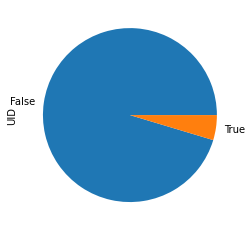

In [137]:
killed_in_march.groupby('Flee')['UID'].count().sort_values(ascending=False).plot(kind='pie')

What time were they killed?****

In [138]:
killed_in_march.groupby('Date')['UID'].count().sort_values(ascending=False).head(10)

Date
3/24/2016    13
3/13/2016    13
3/11/2015    13
3/19/2015    13
3/27/2015    13
3/7/2016     12
3/17/2015    12
3/19/2016    10
3/10/2015    10
3/17/2016    10
Name: UID, dtype: int64

In [139]:
killed_in_march.groupby('Year')['UID'].count().sort_values(ascending=False)

Year
2016    206
2015    198
2014     98
2013     98
2011     65
2010     64
2012     53
2009     50
2006     48
2004     45
2008     43
2005     42
2003     40
2007     38
2002     34
2001     22
2000     19
Name: UID, dtype: int64

<AxesSubplot:xlabel='Year'>

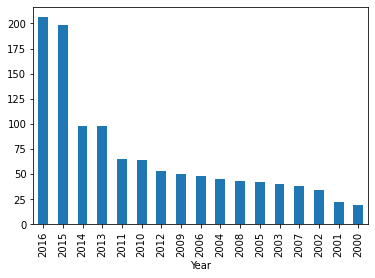

In [140]:
killed_in_march.groupby('Year')['UID'].count().sort_values(ascending=False).plot(kind='bar')

In [141]:
killed_in_march.groupby('Day')['UID'].count().sort_values(ascending=False)

Day
10    56
20    50
19    49
31    48
13    48
27    48
17    47
7     45
21    44
24    42
18    39
16    39
12    39
8     39
5     39
1     38
11    37
6     36
23    34
26    34
29    34
14    33
15    32
9     31
25    30
4     29
30    27
22    27
3     25
28    24
2     20
Name: UID, dtype: int64

<AxesSubplot:xlabel='Day'>

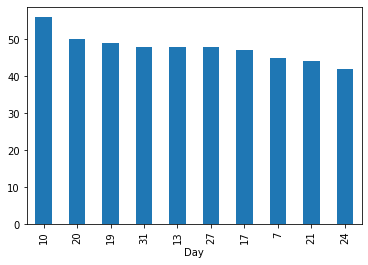

In [142]:
killed_in_march.groupby('Day')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar')

Which race recorded the most murders in March?

In [143]:
killed_in_march.groupby('Race')['UID'].count().sort_values(ascending=False)

Race
UnKnown     383
White       358
Black       228
Hispanic    164
Native       13
Asian        12
Other         5
Name: UID, dtype: int64

<AxesSubplot:xlabel='Race'>

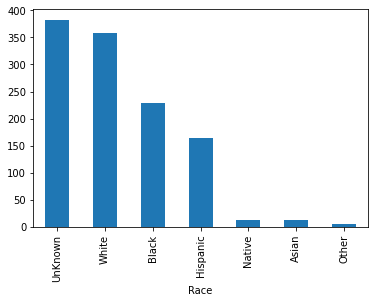

In [144]:
killed_in_march.groupby('Race')['UID'].count().sort_values(ascending=False).plot(kind='bar')

Where were they killed during March? The city? The state? The region?

In [145]:
killed_in_march.groupby('City')['UID'].count().sort_values(ascending=False).head(10)

City
Los Angeles     30
Houston         29
Phoenix         18
Chicago         16
Dallas          12
Jacksonville    12
San Diego       12
San Antonio     11
Bakersfield     11
Albuquerque     11
Name: UID, dtype: int64

<AxesSubplot:xlabel='City'>

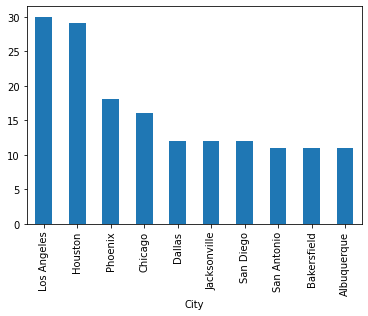

In [146]:
killed_in_march.groupby('City')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [147]:
killed_in_march.groupby('State')['UID'].count().sort_values(ascending=False).head(10)

State
California        278
Florida           107
Texas             103
Arizona            60
New York           41
Wyoming            37
North Carolina     31
Maryland           31
Illinois           26
Alabama            26
Name: UID, dtype: int64

<AxesSubplot:xlabel='State'>

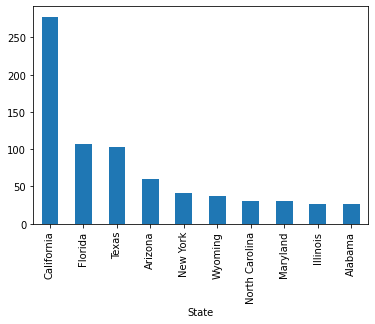

In [148]:
killed_in_march.groupby('State')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [149]:
killed_in_march.groupby('Region')['UID'].count().sort_values(ascending=False)

Region
west         494
south        430
Midwest      139
northeast    100
Name: UID, dtype: int64

<AxesSubplot:ylabel='UID'>

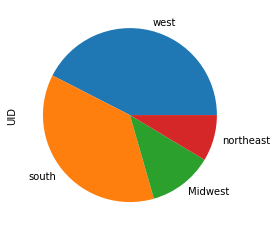

In [150]:
killed_in_march.groupby('Region')['UID'].count().sort_values(ascending=False).plot(kind='pie')

# Which week records the most Kill Events by police?
How many black are there?
And how many Senior Adult of them?
How many armed with a gun of them?

# Which city records the most Kill Events by police?

In [151]:
data.groupby('City')['UID'].count().sort_values(ascending=False).head(10)

City
Los Angeles     297
Houston         247
Phoenix         176
Chicago         175
Las Vegas       153
Miami           104
San Diego       104
Dallas           99
Tucson           93
Jacksonville     93
Name: UID, dtype: int64

<AxesSubplot:ylabel='City'>

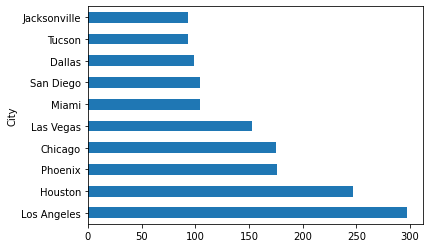

In [152]:
data.groupby('City')['UID'].count().sort_values(ascending=False).head(10).plot(kind='barh')

In [153]:
kiled_in_los_Angeles=data[data['City']=='Los Angeles']

In [154]:
kiled_in_los_Angeles.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,Region,Year,Month,Quarter,Day,Week,Stages of Life
10,965,Douglas Kim,55,Male,Asian,2/24/2002,Los Angeles,California,Shot,Gun,False,False,west,2002,2,1,24,8,Middle Age Adult
46,4241,Samuel Om,21,Male,Asian,5/13/2008,Los Angeles,California,Shot,Gun,False,False,west,2008,5,2,13,20,Adult
66,6668,Shonchy Thaopraseuth,22,Male,Asian,2/23/2012,Los Angeles,California,Shot,Gun,False,False,west,2012,2,1,23,8,Adult
94,9019,Eddie Dougie Phongsavad,45,Male,Asian,4/13/2014,Los Angeles,California,Shot,Knife,False,False,west,2014,4,2,13,15,Middle Age Adult
162,14452,Marion Habana,28,Male,Asian,4/30/2016,Los Angeles,California,Shot,Knife,False,False,west,2016,4,2,30,18,Adult


In [155]:
kiled_in_los_Angeles.groupby('Age')['UID'].count().sort_values(ascending=False).head(10)

Age
35    17
22    15
25    14
26    14
29    13
34    13
19    12
24    12
18    11
39    10
Name: UID, dtype: int64

<AxesSubplot:xlabel='Age'>

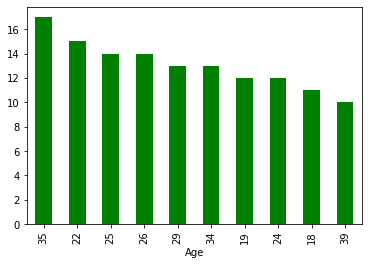

In [156]:
kiled_in_los_Angeles.groupby('Age')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='green')

In [157]:
kiled_in_los_Angeles.groupby('Stages of Life')['UID'].count().sort_values(ascending=False)

Stages of Life
Adult               194
Middle Age Adult     58
Teen                 36
Senior Adult          8
Infant                1
Name: UID, dtype: int64

<AxesSubplot:xlabel='Stages of Life'>

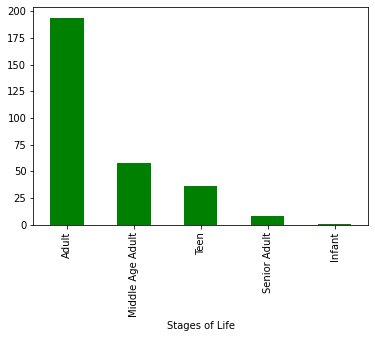

In [158]:
kiled_in_los_Angeles.groupby('Stages of Life')['UID'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='green')

# Which State records the most Kill Events by police?

# Which gender records the most Kill Events by police?

# Which age records the most Kill Events by police?

# Which Race records the most Kill Events by police?

# Which manner of death records the most Kill Events by police?

# Which type of arm records the most Kill Events by police?

# Which stage of life records the most Kill Events by police?